# Probability

**Learning Objectives:** Learn about random variables and their relationship to discrete and continouous probability distributions. Learn about joint, conditional and marginal distributions and their relationship to tidy tables.

## Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
%matplotlib inline

## 1. Probability

## 2. Random variables

We have learned previously that a **variable** is a quantity that has been measured or observed. In a tidy dataset, a variable is represented by a single column in a table. These variables are usually encoded using one of the fundamental data types:

* Quantity
* Categorical (ordinal, nominal)
* Date/time
* Text
* Geographical

A **random variable** is a variable whose value is different each time you ask it in a manner that is determined by chance or randomness. This definition doesn't make any assumptions about what the source of randomness is. Some possibilities:

* Inherent randomness
* Incomplete observability
* Incomplete modelling

Some examples:

* Daily closing price of a stock.
* Temperature in this room.
* Ages of people taking this course.
* The brands of mobile phones used by a group of people.
* The sequence of n-grams from the text of a book.
* The position of a particle whose motion is governed by Newton's laws.

Notice that in many of these cases, there is some underlying process that may not be random. Normally, we wouldn't say that the text of a book is random. However, when we model that text statistically, it is still helpful to model aspects of it using random variables.

In a programming language like Python, random variables are typically represented by functions, that must be called to return a new realization of the random variable. The `random` module in Python's standard library has some of these function as does the `numpy.random` package. Here are 10 realizations of a random variable with a uniform distribution between $0$ and $1$:

In [3]:
for i in range(10):
    print(np.random.rand())

0.32266880737343395
0.10739081343079282
0.027004392107210173
0.6347160810763082
0.7496011510040531
0.6508369463761132
0.8431508673008397
0.48323421808563227
0.9612216107029493
0.3730544794788381


As this example shows, random variables typically take on value that follow some distribution. In this case, the underlying distribution was the uniform distribution between $[0,1]$. In mathematical notation, we would write this as:

$$x \sim U(0,1) $$

In english, we would say:

> The random variable $x$ takes on values distributed according to the uniform distribution over the interval $[0,1]$.

Here is another example:

$$ x \sim N\left( \mu=2.0, \sigma^2=1.0 \right)$$

> The random variable $x$ takes on values distributed according to the normal distribution with a mean of $2.0$ and variance of $1.0$.

In [4]:
μ = 2.0
σ = np.sqrt(1.0)
for i in range(10):
    print(np.random.normal(μ, σ))

2.8118364452470717
2.6845127241054323
2.281905548832084
1.6460171243560362
2.8986418360136956
2.6859481321713456
0.9196867605395085
2.06267723157424
2.7646586828716844
2.7666377529420427


Thus, in order to study random variables, we need to understand **probability distributions**.

## 3. Probability Distributions

A **probability distribution** is a mathematical recipie for generating random variables with a particular distribution. There are two broad types fo probability distributions:

* Discrete (integers, categorical, nominal, ordinal)
* Continuous (quantitative, temporal)

A full review of probability theory is beyond the scope of this notebook, but here is a very helpful Wikipedia page on the topic:

https://en.wikipedia.org/wiki/Probability_distribution

In general, there are two things that a probability distribution must specify:

1. The set of values or outcomes the random variable can have.
2. The relative probabilities of those outcomes.

### 3.1 Discrete variables

For a discrete random variable, the probability distribution is specified by a **probability mass fuction** or **PMF** $P(x)$. A PMF has the following properties:

1. For $P(x)$, the set of all outcomes of the random variable $x$ are a discrete set
2. For all $x$, $0 \geq P(x) \leq $ 1
3. $\sum_x P(x) = 1$

Here is an example of a discrete random variable that shows these properties:

* The outcomes of $x$ are $\{summer, winter\}$
* The probabilities are $[0.25, 0.75]$ and they add up to $1$

In [5]:
for i in range(10):
    print(np.random.choice(['summer', 'winter'], p=[0.25, 0.75]))

winter
winter
winter
winter
winter
winter
winter
summer
summer
winter


### 3.2 Continuous variables

For a continuous random variable, the probability distribution is specified by a **probability density function** or **PDF**. A PDF has the following properties:

1. For $P(x)$, the set of all outcomes of the random variable $x$ are an interval of real numbers $[x_1, x_2]$
2. For all $x$, $P(x) \geq 0$
3. $\int P(x) dx = 1 $

Here is an example of a continuous random variable that shows these properties:

* The outcomes are the real numbers in the interval $[1.0, 3.0]$
* All outcomes are equally likely (uniform distribution)

In [6]:
x = np.random.uniform(1.0, 3.0, 100)

In [7]:
x[0:10]

array([ 2.70299594,  1.65214989,  1.64886855,  2.63706334,  1.94087   ,
        2.44905817,  1.43984765,  2.55005817,  1.17734893,  2.90467294])

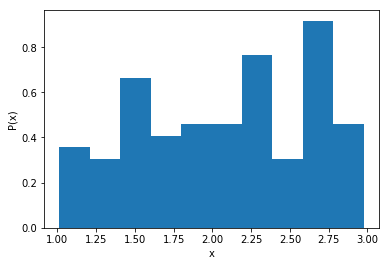

In [8]:
pdf, bins, patches = plt.hist(x, normed=True)
plt.xlabel('x')
plt.ylabel('P(x)');

When `normed=True`, Matplotlib, normalizes the histogram so that the area underneath the histogram is $1.0$, just as a proper PDF should have. It returns the PDF, and bins, so we can compute that area as an sum:

In [9]:
np.sum(pdf * np.diff(bins))

0.99999999999999989

Note that the actual PDF isn't jagged like this, but is rather completely smooth. To see the smooth PDf, we need to drawn more samples. Let's explore this using `interact`:

In [10]:
def plot_uniform_pdf(n):
    x = np.random.uniform(1.0, 3.0, n)
    plt.hist(x, normed=True, bins=20)
    plt.xlabel('x')
    plt.ylabel('P(x)')
    plt.xlim(1.0, 3.0)
    plt.ylim(0.0, 1.0)

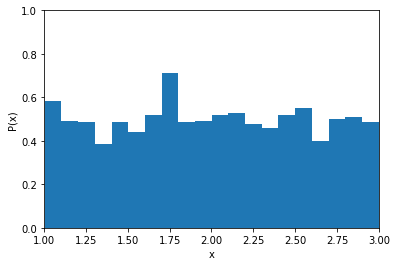

In [12]:
interact(plot_uniform_pdf, n=(100,2000,100));

This illustrates some important ideas in statistical modelling:

* Knowing individual samples/outcomes from a probability distribution isn't enough information to fully construct the parameters of the original distribution.
* The more samples/outcomes you have, the closer you can get to the original distribution.
* In general, if you don't know underlying probability distribution, you can't even infer which distribution generated the samples (uniform, normal, etc.).

### 4. Marginal probability

### 5. Conditional probability

### 6. The chain rule of conditional probability

### 7. Independence and conditional independence

### 8. Expectation, variance and covariance